# Money Talks: Gender Disparities in Tech

In [1]:
from IPython.display import Image
Image("A-14_Manage_Chaos_feature.jpg")

In [2]:
# Import libraries.
import warnings
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# Visualization libraries.
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Disable Anaconda warnings.
warnings.filterwarnings('ignore')

In [3]:
# Read database 2019.
mc = pd.read_csv(
    '~/Projects/portfolio/storytelling/data/data_2019/multiple_choice_responses.csv')

# Read database 2018.
mc_2018 = pd.read_csv(
    '~/Projects/portfolio/storytelling/data/data_2018/multipleChoiceResponses.csv'
)

# Read database 2017.
mc_2017 = pd.read_csv(
    '~/Projects/portfolio/storytelling/data/data_2017/multipleChoiceResponses.csv',
    encoding='ISO-8859-1')

# Theme colors.
blues = [
    'rgb(255,255,255)',
    'rgb(107,174,214)',
    'rgb(66,146,198)',
    'rgb(33,113,181)',
    'rgb(8,81,156)',
    'rgb(8,48,107)'
]
pinks = [
    'rgb(255,255,255)',
    'rgb(201,148,199)',
    'rgb(223,101,176)',
    'rgb(231,41,138)',
    'rgb(206,18,86)',
    'rgb(152,0,67)',
    'rgb(103,0,31)'
]

# Renaming multiple question data from 2017, 2018, 2019.
mc = mc.rename(columns={
    "Q1": "Age", "Q2": "Gender", "Q3": "Country", "Q4": "Education",
    "Q5": "Role", "Q10": "Salary", "Q15": "Coding_years"
})

mc_2017 = mc_2017.rename(columns={
    "GenderSelect": "Gender", "CurrentJobTitleSelect": "Role"
})

mc_2018 = mc_2018.rename(columns={
    "Q1": "Gender", "Q2": "Age", "Q3": "Country",
    "Q4": "Education", "Q6": "Role", "Q9": "Salary", "Q10": "ML_methods"
})

# Dropping the question row.
mc.drop(0, axis=0, inplace=True)
mc_2018.drop(0, axis=0, inplace=True)

# Gender-Pay Gap and Lack of Fit
It's no secret that there is a gender-pay gap across many industries. 

In the western world, women began entering the workforce in or around the 1970s, when a single income could no longer sufficiently provide for a middle-class family [[1]](https://www.huffpost.com/entry/women-in-the-workforce-wh_b_4462455). The driving factor at this point was an economic need rather than a consideration of what women could contribute, and unfortunately, not all occupations were open to women. Presumably, because women were restricted and undervalued by society, they restricted and undervalued themselves. The leading occupations for women in 1970 were secretaries, bookkeepers, and elementary school teachers. The fact that these positions were paid less than the leading occupations for men in the 70s: entry-level managers, truck drivers, or production supervisors, seemed obvious [[1]](https://www.huffpost.com/entry/women-in-the-workforce-wh_b_4462455). 

With the tech sector becoming an increasingly dominant industry over the past two decades [[2]](https://vincentbenjamin.com/tech-timeline-a-brief-history-of-the-information-technology-industry/) - five decades since women began joining the workforce - one would think that the tech industry wouldn't be slighted towards male or female employees. However, according to diversity reports published by 11 of the world's largest tech companies in 2014, **the average percentage of women working in the tech industry was about 30%, despite women making up over 50% of the workforce in most western countries** [[3]](https://www.cnet.com/news/women-in-tech-the-numbers-dont-add-up/). Within that 30% of female employees, women occupied anywhere from 10-17% of in technical positions and 21-26% percent of leadership positions in Microsoft, Twitter and Google [[3]](https://www.cnet.com/news/women-in-tech-the-numbers-dont-add-up/).       
These numbers can be largely attributed to our unconscious biases towards males in most industries, despite women holding more degrees than men in the US, UK, and Canada [5,7]. According to a global online study, **76% of 200,000 participants see men as better suited as career professionals and women as homemakers** [[4]](https://www.forbes.com/sites/break-the-future/2016/12/20/think-youre-not-biased-against-women-at-work-read-this/). This is often referred to by academics as the lack of fit principle, which occurs when there is a discrepancy between what a someone is thought to be like and what is thought to be required for success. These presumptions are often based on gender, and requirements for success are often attributed to perceived male-like traits, such as agency [[5], [[6]](https://doi.org/10.1073/pnas.1211286109)]. These biases are consistently proven to be echoed throughout hiring and evaluative processes of organizations, universities and even orchestras [[5], [[6]](https://doi.org/10.1073/pnas.1211286109)], and they lead to women in what are traditionally, and perhaps unconsciously, thought to be male-like professions, such as science, technology, engineering, math and management, being underestimated, devalued and consequently, underpaid. 

In addition to corporations and organizations undervaluing women, women may also undervalue themselves. A Hewlett Packard internal report suggested that **men will apply for a job even when they meet only 60% of the qualifications, but women will only apply if they meet 100% of them** [[8]](https://hbr.org/2014/08/why-women-dont-apply-for-jobs-unless-theyre-100-qualified).

For these reasons, we have chosen to focus our analysis on survey respondents' gender, location, education, experience, occupation and income.

# Assumptions & Omissions 

* We acknowledge that the data collected is from those reachable by Kaggle channels, and is thereby a limited representation of the global data science (DS) and machine learning (ML) industry. We hope that future surveys will expand their reach to further channels, so that we can observe, analyze and learn from a more full representation of the industry. The data is also limited to those who were willing and had sufficient time to complete the survey.

* We will use the term 'gender' to refer to those who self-identified in the survey as either male or female. Although we are happy to see the inclusion of alternative gender categories for the sake of inclusivity and progress, because we are choosing to analyze the data by gender, the categories preferred not to say and self-described are not statistically significant in our analysis. The data will be omitted for the purpose of data clarity. Given this, when we refer to ratios or percentages, we are referring to the percentage of female respondents to female and male respondents, rather than overall survey respondents.

* Country data falling under the category of "other" has been omitted, as it does not contribute to our analysis.

* For the purpose of our analysis, countries with like-data were grouped together into continents, for the most part. The country groupings are as follows:
    - Africa: Algeria, Egypt, Kenya, Morocco, Nigeria, South Africa, Tunisia
    - Asia: Bangladesh, China, Hong Kong, India, Japan, Pakistan, Republic of Korea, Russia, Singapore, South Korea, Taiwan
    - Europe: Austria, Belarus, Belgium, Czech Republic, Denmark, France, Germany, Greece, Hungary, Ireland, Italy, Netherlands, Norway, Poland, Portugal, Romania, Spain, Sweden, Switzerland, Ukraine, United Kingdom 
    - Middle East: Iran, Israel, Saudi Arabia, Turkey
    - North America: Canada and United States
    - Oceania: Australia, New Zealand
    - South America: Argentina, Brazil, Chile, Colombia, Mexico, Peru
    - South East Asia: Indonesia, Thailand, Malaysia, Philippines, Vietnam

# Overview: Gender Statistics

In [4]:
def get_percentage(df, axis=0):
    """
    Take dataframe and return percentage dataframe.
    Taken percentage by column on default, unless passed axis=1.
    """
    if axis == 0:
        return (df / df.sum()) * 100
    elif axis == 1:
        return df.div(df.sum(axis=1), axis=0) * 100
    else:
        print("Axis must be 0 or 1")


# Creating dataframe.
df_gender_distro = mc[["Country", "Gender"]].groupby("Gender").count()
df_gender_distro = get_percentage(df_gender_distro)
df_age_distro = mc[["Country", "Gender", "Age"]].groupby(["Gender", "Age"]).count()

# Plotting.
# Creating subplots to fit plots in a certain positions.
fig = make_subplots(2, 4, specs=[
    [{"type": "xy"}, {}, {}, {"type": "domain"}],
    [{}, {}, {}, {}]
])

# Looping through all genders for plotting bar traces for each age group.
genders = ['Male', 'Female', 'Prefer not to say', 'Prefer to self-describe']
for i in range(len(genders)):
    df_age = df_age_distro.xs(genders[i], level="Gender").reset_index()
    fig.add_trace(go.Bar(
                        name=genders[i],
                        x=df_age["Age"], y=df_age["Country"],
                        hovertemplate="<i>Age: %{label} <br>Amount: %{y} </br>",
                        marker=(dict(opacity=0.6)),
                        ), 1, 1)

# Plotting pie chart of gender distribution.
fig.add_trace(go.Pie(
    name="",
    values=df_gender_distro["Country"].values,
    labels=df_gender_distro["Country"].index,
    hovertemplate="<i>%{label} <br>%{percent} </br>",
    showlegend=False,
), 1, 4)

# Update layout and axes.
fig.update_layout(title={
                        'text': "Global Age Distribution by Gender",
                        'y': 0.95,
                        'x': 0.45,
                        'xanchor': 'center',
                        'yanchor': 'top'
                        },
                  barmode='group',
                  margin=dict(t=50),
                  plot_bgcolor='#fff', 
                  xaxis=dict(
                      domain=[0, 1.0]
                    ),
                  yaxis1=dict(
                      domain=[0., 1.0]
                  ))

fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                showgrid=True, gridcolor='lavender')

fig.show()

* The chart above shows the number and percentage of survey respondents grouped by age and gender. The chart is interactive, so you can de-select and select any of the categories to find exact numbers.     
* As you can see, the data resulting from the categories preferred not to say and self-described are not statistically significant in our analysis and will thus be omitted from further data representations. 
* **You'll notice that there are significantly less female (16.6%) than male (83.4%) respondents**. The age distribution for female and male respondents, however, is relatively the same: both data sets are normally distributed, with a mean of 25-29 years of age. 
* The majority of male and female survey respondents are between the ages of 22 and 34, as may be expected from any up-and-coming global industry/ workforce.
* Now that we've grasped the age and gender of respondents, we'll look at where respondents are living to see if we notice any further trends. 

In [5]:
def build_datafarme(df, cols, dic=None):
    """"
    Build dataframe from original data, with columns passed in cols.
    Add continents to if dic is not None and Country col exist.
    type(cols): list.
    type(dic): dict.
    """
    df = df[cols]

    # Leaving only female or male.
    if "Gender" in cols:
        df = df[df["Gender"].isin(["Female", "Male"])]
    
    # Renaming some countries and dropping "other".
    if "Country" in cols:
        df.drop(df[df["Country"] == "Other"].index, inplace=True)
        df.replace({'Iran, Islamic Republic of...': 'Iran',
                    'United States of America': 'United States',
                    'Viet Nam': 'Vietnam',
                    "People 's Republic of China": 'China',
                    "United Kingdom of Great Britain and Northern Ireland":
                    'United Kingdom',
                    "Hong Kong (S.A.R.)": "Hong Kong"},
                   inplace=True)
        if dic:

            # Add continents column.
            data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in dic.items()]))
            s = data.stack().reset_index().set_index(0)["level_1"]
            df["Continent"] = df["Country"].map(s)
    
    # Renaming some "Education" values. 
    df.replace({
        'Some college/university study without earning a bachelor’s degree':
        'Some college/university',
        'No formal education past high school': 'High school',
        'I prefer not to answer': 'Not Mentioned'
    }, inplace=True)

    # Changing None values to "Not Mentioned".
    df.fillna('Not Mentioned', inplace=True)
    
    # Add a column of ones. Helps for counting after grouping.
    df["Ones"] = 1

    # Reordering the columns.
    df = df[str('Continent,' + str(','.join(cols)) + ',Ones').split(',')]

    return df

In [6]:
# Creating a dataframe of the survey.
dic = {
    'Middle East': ['Iran', 'Israel', 'Saudi Arabia', 'Turkey'],
    'Africa': ['Algeria', 'Egypt', 'Kenya', 'Morocco',
               'Nigeria', 'South Africa', 'Tunisia'],
    'North America': ['Canada', 'United States'],
    'South America': ['Argentina', 'Brazil', 'Chile',
                      'Colombia', 'Mexico', 'Peru'],
    'Europe': ['Austria', 'Belarus', 'Belgium', 'Czech Republic', 'Denmark',
               'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
               'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
               'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
    'Oceana': ['Australia', 'New Zealand'],
    'Asia': ['Bangladesh', 'China', 'Hong Kong', 'India', 'Japan',
             'Pakistan', 'Republic of Korea', 'Russia', 'Singapore',
             'South Korea', 'Taiwan'],
    'South East Asia': ['Indonesia', 'Thailand', 'Malaysia',
                        'Philippines', 'Vietnam']
}

cols = ["Gender", "Country", "Age", "Role", "Education", "Salary", "Coding_years"]

df = build_datafarme(mc, cols, dic)

# Dividing male and female to two separate dataframes.
df_female = df[df["Gender"] == "Female"]
df_male = df[df["Gender"] == "Male"]

## Percentages of Female Respondents by Country

In [7]:
# Creating dataframe of female ratio around the world.
df_female_ratio = df[["Age", "Gender", "Country"]].groupby("Country")["Gender"].value_counts().unstack().fillna(0)
df_female_ratio["% Female"] = round((df_female_ratio["Female"] / (df_female_ratio["Male"]+df_female_ratio["Female"])) * 100, 1)

# Plotting female ratio on a world map.
fig = go.Figure()

fig.add_trace(go.Choropleth(
    locationmode='country names',
    locations=df_female_ratio.index,
    text=df_female_ratio.index,
    z=df_female_ratio["% Female"],
    colorscale="Reds",
    colorbar_tickprefix='%',
    colorbar_title='% Female',
    ))

fig.update_layout(title={'text': "Percentages of Female Respondents by Country",
                         'y': 0.95,
                         'x': 0.45,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  margin=dict(t=50),
                  geo=dict(
                      showframe=False,
                      projection_type='equirectangular',
                 ))
fig.show()

* The map above visually depicts the percentage of female respondents in each country. You'll notice that the lighter-shaded countries have lower percentages of females and the darker-shaded countries have higher percentages.
* **The average percentage of female respondents in a country is 16.6%, with the lowest percentages in Norway (4%) and Japan (8%), and the highest percentages in Tunisia (48%), the Philippines (32%), Iran & Malaysia (29%) and Kenya (25%).**   
* This visualization demonstrates that data can generally be clustered into continents (North America, South & Central America [called South America for the purpose of this analysis], Europe, Middle East, Africa, Asia & South-East Asia), which we will use for the remainder of this analysis.  
* The map highlights well above-average percentages of women in parts of Africa, South-east Asia, and the Middle East, which is interesting because it challenges commonly-held beliefs about women from these areas. 
* Next we'll look at levels of education for men and women in DS & ML around the world. 

# Education & Experience

In [8]:
# Creating datafarme of education by gender of the working people.
df_edu = df[~df["Role"].isin(["Student", "Not Mentioned",
                              "Not employed", "Other"])]

# Dividing dataframes by genders.
df_edu_female = df_edu[df_edu["Gender"] == "Female"]
df_edu_male = df_edu[df_edu["Gender"] == "Male"]

# Percentages of every role, taken for each gender separately.
df_edu_per_female = df_edu_female.groupby("Education").count()["Ones"]
df_edu_per_female = get_percentage(df_edu_per_female).reindex([
    'Doctoral degree', 'Master’s degree', 'Bachelor’s degree',
    'Some college/university', 'Professional degree', 'High school',
    'Not Mentioned'
])

# Dividing dataframes by genders.
df_edu_per_male = df_edu_male.groupby("Education").count()["Ones"]
df_edu_per_male = get_percentage(df_edu_per_male).reindex(df_edu_per_female.index)

# Plotting
fig = go.Figure(data=[
    # plot male
    go.Bar(name="Male", x=df_edu_per_female.index, y=df_edu_per_male.round(1),
           marker=(dict(opacity=0.6)),
           marker_color=blues[2],
           hovertemplate="<i>%{label} <br>%{y} </br>"),
    # plot female
    go.Bar(name="Female", x=df_edu_per_female.index, y=df_edu_per_female.round(1),
           marker=(dict(opacity=0.6)),
           marker_color=pinks[2],
           hovertemplate="<i>%{label} <br>%{y} </br>")
])

fig.update_layout(margin=dict(t=30),
                  title={'text': "Global Education Levels by Gender",
                         'y': 1.0,
                         'x': 0.45,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  plot_bgcolor='#fff', 
                  )
fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridcolor='lavender',
                 tickprefix="%")

fig.show()

* The chart above compares the education levels of male and female survey respondents by percentage of respondents in their gender group. For example, 20% of female respondents have a doctoral degree, compared to 16.1% of male respondents. 
* You'll see that higher percentages of women respondents have obtained graduate-level education than men, while a higher percentage of men have an undergraduate degree. The data also shows that there are less women with some university/ college education but no degree, and no education past high school.  
* As such, **generally speaking, female survey respondents are more educated than their male counterparts.**
* Now that we've observed levels of education, we'll look at the numbers in terms of experience.


In [9]:
def build_hierarchical_dataframe(df, levels, value_column, name=None):
    """
    Build a hierarchy of levels for Sunburst or Treemap charts.

    Levels are given starting from the bottom to the top of the hierarchy,
    ie the last level corresponds to the root.
    """

    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value', 'percentage'])

    for i, level in enumerate(levels):
        df_tree = pd.DataFrame(columns=['id', 'parent', 'value'])
        dfg = df.groupby(levels[i:]).sum(numerical_only=True)
        dfg = dfg.reset_index()
        df_tree['id'] = dfg[level].copy()

        if i < len(levels) - 1:
            df_tree['parent'] = dfg[levels[i+1]].copy()
        else:
            df_tree['parent'] = name

        df_tree['value'] = dfg[value_column]
        df_all_trees = df_all_trees.append(df_tree, ignore_index=True)

    total = pd.Series(dict(id=name, parent='',
                           value=df[value_column].sum(),
                           percentage=0
                           ))

    df_all_trees = df_all_trees.append(total, ignore_index=True)

    for i in range(len(df_all_trees)-1):
        parent = df_all_trees['parent'].iloc[i]
        df_all_trees["percentage"].iloc[i] = df_all_trees["value"].iloc[i] / \
            float(df_all_trees[df_all_trees['id'] == parent]['value'])

    return df_all_trees


def plot_sunburst(df_all_trees1, df_all_trees2, title):
    """Plotting sunburst subplots"""
    fig = go.Figure()

    fig.add_trace(go.Sunburst(
        labels=df_all_trees1['id'],
        parents=df_all_trees1['parent'],
        values=df_all_trees1['value'],
        branchvalues='total',
        domain=dict(column=0),
        marker=dict(
            colors=df_all_trees1['percentage'],
            colorscale=pinks,
        ),
        hovertemplate='<b>%{label} </b>' +
                      '<br><i>Amount: %{value}' +
                      '<br>Percentage: %{color:%.2f}<i>',
        name='Female',
        maxdepth=2
    ))

    fig.add_trace(go.Sunburst(
        labels=df_all_trees2['id'],
        parents=df_all_trees2['parent'],
        values=df_all_trees2['value'],
        branchvalues='total',
        domain=dict(column=1),
        marker=dict(colors=df_all_trees2['percentage'],
                    colorscale=blues
                    ),
        hovertemplate='<b>%{label} </b>' +
                      '<br><i>Amount: %{value}' +
                      '<br>Percentage: %{color:%.2f}<i>',
        name='Male',
        maxdepth=2
    ))

    fig.update_layout(margin=dict(t=50, b=50, r=50, l=50),
                      grid=dict(columns=2, rows=1),
                      title={'text': title,
                             'y': 0.95,
                             'x': 0.45,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      plot_bgcolor='#fff'
                      )
    fig.show()

In [10]:
# Creating dataframe of role and education.
df_high_edu = df.drop(
    df[(df["Role"] == "Student") | (df["Role"] == "Not Mentioned") |
       (df["Role"] == "Other") | (df["Education"] == 'Not Mentioned')].index
)

# Grouping education to two groups: lower and higher.
df_high_edu.replace({
    'Bachelor’s degree': 'Lower education',
    'Professional degree': 'Lower education',
    'Some college/university': 'Lower education',
    'High school': 'Lower education',
    'Master’s degree': 'Higher education',
    'Doctoral degree': 'Higher education',
}, inplace=True)

# Adding different spacing per continent to the "Role" column.
# Solve the problem of multiple ids passed to sunbrust plot.
continents = df_high_edu["Continent"].unique()
i = 0

for continent in continents:
    condition = df_high_edu["Continent"] != continent
    df_high_edu["Role"].where(condition, df_high_edu["Role"] + ' '*i, inplace=True)
    i += 1
    

# Dividing dataframe to female and male.
df_high_edu_female = df_high_edu[df_high_edu["Gender"] == "Female"]
df_high_edu_male = df_high_edu[df_high_edu["Gender"] == "Male"]

# Creating dataframe of only lower education.
df_lower_edu = df_high_edu[df_high_edu["Education"] == "Lower education"]
df_lower_edu.drop(df_lower_edu[df_lower_edu["Coding_years"] == "Not Mentioned"].index,
                  inplace=True)
# Grouping coding experience to three groups: begginer, intermediate and pro.
df_lower_edu["Coding_years"].replace({
    'I have never written code': '0 years', '0 years': 'Begginer', 
    '1-2 years': 'Begginer', '< 1 years': 'Begginer', '3-5 years': 'Intermediate', 
    '5-10 years': 'Pro', '10-20 years': 'Pro', '20+ years': 'Pro'
}, inplace=True)

# Dividing dataframe by gender.
df_lower_edu_female = df_lower_edu[df_lower_edu["Gender"] == "Female"]
df_lower_edu_male = df_lower_edu[df_lower_edu["Gender"] == "Male"]

# Plotting sunburst of experience by continent.
levels = ["Coding_years", "Continent"]
value_column = 'Ones'

df_all_trees1 = build_hierarchical_dataframe(
    df_lower_edu_female, levels, value_column, name='Female')
df_all_trees2 = build_hierarchical_dataframe(
    df_lower_edu_male, levels, value_column, name='Male')

plot_sunburst(df_all_trees1, df_all_trees2,
              title="Coding Experience by Gender and Continent")

* The above charts show female and male survey respondent data grouped by continent and coding experience.
* For the purpose of the analysis, we considered anyone with less than 5 years of coding experience to be a *beginner*; 5-10 years coding experience as an *intermediate* and over 10 years of coding experience a *pro*.  
* You'll notice that the majority of survey respondents (39% of females and 47% of males) fall within the 'Asia' country grouping, with North American respondents representing 20% of females and 15% of males. 
* Within all country groupings except Africa, **men are more likely to having more coding experience**. It is unclear, however, how well "coding experience" was defined. There is a potential that some may have considered their education as coding experience and others may not have, which could skew the data.
* The data also shows high percentages of beginners for females and males in Asia, Africa, South America, South-east Asia and the Middle East, meaning industry knowledge will expand significantly and globally over the next decade. 
* Next, we'll look at education levels by gender and occupation.   

In [11]:
# Plotting sunburst of role and education continent.
levels = ["Education", "Role", "Continent"]
value_column = 'Ones'

df_all_trees1 = build_hierarchical_dataframe(
    df_high_edu_female, levels, value_column, name='Female')
df_all_trees2 = build_hierarchical_dataframe(
    df_high_edu_male, levels, value_column, name='Male')

plot_sunburst(df_all_trees1, df_all_trees2,
              title="Education Levels by Gender, Continent and Occupation")

* The above charts represent male and female respondents' education levels in each occupation, broken down first by continent, then occupation and education. 
* For the purpose of the analysis, we've grouped graduate and post-graduate level education (Masters and Doctorates) into *higher education* and Bachelor's degrees and below as *lower education*. Students were omitted from this part of the analysis, as it seeks to capture education levels of the workforce rather than those entering the workforce. We decided to include the data on unemployed respondents, to observe any trends of educated and unemployed respondents.
* You'll notice that, generally speaking, women have higher levels of education than their male counterparts in the same occupation. 
* Within North American data scientists, for example, 87% of women have a higher education, compared to only 81% of their male counterparts in the same location and occupation. In Asia, 71% of unemployed females have a higher level of education, compared to 54% of males in the same position. In Africa, 47% of female data analysts have a higher education, compared to 44% of their male counterparts. In the Middle East, 84% of data scientists have a higher education, compared to 66% of their male counterparts.
* You'll also notice that despite the high levels of female (in relation to male) respondents in Africa, 18% of females are unemployed, while 12% of their male counterparts are unemployed. Of the unemployed female respondents in Africa, 46% have a higher education compared to 37% of their male counterparts.

In [12]:
# Redefining df_high_edu after changing the "Role" column above.
df_high_edu = df.drop(
    df[(df["Role"] == "Student") | (df["Role"] == "Not Mentioned") |
       (df["Role"] == "Other") | (df["Education"] == 'Not Mentioned')].index
)

df_high_edu.replace({
    'Bachelor’s degree': 'Lower education',
    'Professional degree': 'Lower education',
    'Some college/university': 'Lower education',
    'High school': 'Lower education',
    'Master’s degree': 'Higher education',
    'Doctoral degree': 'Higher education',
}, inplace=True)

# Dividing dataframe by genders.
df_high_edu_female = df_high_edu[df_high_edu["Gender"] == "Female"]
df_high_edu_male = df_high_edu[df_high_edu["Gender"] == "Male"]

# Creating a dataframe of gender percentage for each role.
df_edu_role_female = round(get_percentage(df_high_edu_female.groupby(
    ["Role", "Education"]).count()["Ones"].unstack(), axis=1), 1)
df_edu_role_male = round(get_percentage(df_high_edu_male.groupby(
    ["Role", "Education"]).count()["Ones"].unstack(), axis=1), 1)

# Plotting stacked grouped plot of level of education for each role.
fig = go.Figure()

roles = df_edu_role_female.index
# Plotting male.
fig.add_bar(x=df_edu_role_female.index, y=df_edu_role_male["Higher education"],
            name="Male",
            marker=(dict(opacity=0.6)),
            marker_color=blues[3],
            text=["Higher Education"]*10,
            hovertemplate="<i><b>%{text}</b> <br>%{label} <br>%{y} </br>"
            )
# Plotting female.
fig.add_bar(x=df_edu_role_female.index, y=df_edu_role_female["Higher education"],
            name="Female",
            marker=(dict(opacity=0.6)),
            marker_color=pinks[3],
            text=["Higher Education"]*10,
            hovertemplate="<i><b>%{text}</b> <br>%{label} <br>%{y} </br>"
            )

# Adding shape for lower education per role.
# Solve the problem of no grouped-stacked option.
# Shape for male.
for i in range(10):
    fig.add_shape(go.layout.Shape(
        type="rect",
        xref="x",
        yref="y",
        x0=-0.4 + i,
        x1=0 + i,
        y0=df_edu_role_male["Higher education"][i],
        y1=100,
        fillcolor=blues[1],
        opacity=0.6,
        layer="above",
        line_width=0))

# Shape for female.
for i in range(10):
    fig.add_shape(go.layout.Shape(
        type="rect",
        xref="x",
        yref="y",
        x0=0 + i,
        x1=0.4 + i,
        y0=df_edu_role_female["Higher education"][i],
        y1=100,
        fillcolor=pinks[1],
        opacity=0.6,
        layer="above",
        line_width=0))


fig.update_layout(barmode='group',
                  title={'text': "Global Education Levels by Occupation",
                         'y': 0.95,
                         'x': 0.45,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  legend=dict(itemclick=False),
                  margin=dict(t=50),
                  plot_bgcolor='#fff', 
                  yaxis=dict(title="Higher Education                 Lower Education",
                            title_font=dict(color='lightcoral'))
                  )

fig.update_yaxes(range=[0, 100], title_font=dict(size=18),
                 tickprefix="%",
                showline=True, linewidth=1, linecolor='lightgrey',
                showgrid=True, gridwidth=0.1, gridcolor='lavender')

fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey')

fig.show()

* The above bar graph looks at global education levels of male and female respondents by occupation, with the bottom portion of the bars representing *higher education* and the top portion of the bars representing *lower education*.
* You'll notice there is a consistent trend across each occupation indicating that **a higher percentage of females in *all* occupations possess a higher level of education than their male counterparts**. 
* Of note, women also have higher percentages of unemployment.
* Now that we've established that female respondents generally possess a higher education than their male counterparts, we'll dig further into the data on respondents with a lower education, or Bachelor's degree and below. 

In [13]:
# Creating dataframe of people with bachelor's degree of the top 5 roles.
df_bach = df[df["Education"] == "Bachelor’s degree"][
    (df["Role"] == 'Software Engineer') | (df["Role"] == 'Data Scientist') |
    (df["Role"] == 'Data Analyst') | (df["Role"] == 'Business Analyst') |
    (df["Role"] == 'Not employed')]

# Dividing dataframe by genders.
df_bach_female = df_bach[df_bach["Gender"] == "Female"]
df_bach_male = df_bach[df_bach["Gender"] == "Male"]

# Getting percentages of each role, for each gender.
df_bach_female = df_bach_female.groupby(["Role"]).count()["Ones"]
df_bach_male = df_bach_male.groupby(["Role"]).count()["Ones"]

df_bach_female = get_percentage(df_bach_female).fillna(0)
df_bach_male = get_percentage(df_bach_male).fillna(0)

# Plotting pie charts of roles with bachelor's degree for each gender.
fig = make_subplots(1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# Plot female
fig.add_trace(go.Pie(
    name="",
    values=df_bach_female.values,
    labels=df_bach_female.index,
    hovertemplate="<i>%{label} <br>%{percent} </br>",
), 1, 1)
# Plot male
fig.add_trace(go.Pie(
    name="",
    values=df_bach_male.values,
    labels=df_bach_male.index,
    hovertemplate="<i>%{label} <br>%{percent} </br>",
), 1, 2)

fig.update_traces(hole=.4)
fig.update_layout(title={
    'text': "Occupations Held with Bachelor's Degree by Gender",
    'y': 0.95,
    'x': 0.45,
    'xanchor': 'center',
    'yanchor': 'top'},
    margin=dict(t=50),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Female', x=0.18, y=0.5, font_size=16, showarrow=False),
                 dict(text='Male', x=0.81, y=0.50, font_size=16, showarrow=False)]
)

fig.show()

* The charts above show the occupations held by female and male survey respondents with a Bachelor's degree or less. 
* You'll notice that **4.2% more males manage to enter data science with only a Bachelor's degree** and unemployment for females ~3% higher than their male counterparts with the same level of education. These numbers are both consistent with the findings of the HP internal report mentioned in our introduction [8]. 
* Finally, you'll see that males are more likely to be software engineers and females are more likely to be data analysts. It is unclear as to whether this is due to unconscious biases in the application and hiring processes, or individual preferences, which may or may not be based on internalized unconscious biases.
* Now that we've seen that women are generally more educated than their male counterparts and are less likely to obtain a job with a lower level of education, we'll look at what types of jobs women and men are typically occupying.  


# Occupation

In [14]:
# Creating dataframe of role percentages for each gender.
df_role = df.groupby(["Role", "Gender"]).count()["Ones"].unstack()
df_role = get_percentage(df_role)
df_role.sort_values(by=["Female"], ascending=False, inplace=True)

# Creating a dataframe of the 2018 survey.
dic_2018 = {
    'Middle East': ['Iran, Islamic Republic of...',
                    'Israel', 'Saudi Arabia', 'Turkey'],
    'Africa': ['Egypt', 'Kenya', 'Morocco', 'Nigeria', 'Tunisia'],
    'North America': ['Canada', 'United States'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia',
                      'Mexico', 'Peru'],
    'Europe': ['Austria', 'Belarus', 'Belgium', 'Czech Republic', 'Denmark',
               'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
               'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
               'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
    'Oceana': ['Australia', 'New Zealand'],
    'Asia': ['Bangladesh', 'China', 'Hong Kong', 'India',
             'Japan', 'Pakistan',
             'Republic of Korea', 'Russia', 'Singapore',
             'South Korea'],
    'South East Asia': ['Indonesia', 'Thailand', 'Malaysia',
                        'Philippines', 'Vietnam']
}

cols = ["Gender", "Country", "Age", "Role"]
df_2018 = build_datafarme(mc_2018, cols, dic_2018)

# Removing roles that are not found in 2019 roles.
for role in df_2018.groupby(["Role"]).count().index:
    if role not in df.groupby(["Role"]).count().index:
        df_2018.drop(df_2018[df_2018["Role"] == role].index, inplace=True)

# Creating dataframe of role percentages for each gender in 2018 survey.
df_role_2018 = df_2018.groupby(["Role", "Gender"]).count()["Ones"].unstack()
df_role_2018 = get_percentage(df_role_2018)
df_role_2018 = df_role_2018.reindex(df_role.index)

# Creating a dataframe of the 2017 survey.
cols = ["Gender", "Country", "Age", "Role"]
df_2017 = build_datafarme(mc_2017, cols, dic)

# Creating dataframe of role percentages for each gender in 2017 survey.
df_role_2017 = df_2017.groupby(["Role", "Gender"]).count()["Ones"].unstack()
df_role_2017 = get_percentage(df_role_2017)
df_role_2017 = df_role_2017.reindex(df_role.index)


# Plotting subplots of roles by genders, for years 2017-2019.
fig = make_subplots(
    rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.05,
    subplot_titles=("2019", "2018", "2017")
)
# Plot 2017
fig.add_bar(name="Male", x=df_role_2017.index, y=df_role_2017["Male"].round(1),
            marker=dict(color="royalblue", opacity=0.6),
            marker_color=blues[2],
            hovertemplate="<i>%{label} <br>%{y} </br>",
            row=3, col=1)

fig.add_bar(name="Female", x=df_role_2017.index, y=df_role_2017["Female"].round(1),
            marker=dict(color="tomato", opacity=0.6),
            marker_color=pinks[2],
            hovertemplate="<i>%{label} <br>%{y} </br>",
            row=3, col=1)

# Plot 2018
fig.add_bar(name="Male", x=df_role_2018.index, y=df_role_2018["Male"].round(1),
            showlegend=False,
            marker=dict(color="royalblue", opacity=0.6),
            marker_color=blues[2],
            hovertemplate="<i>%{label} <br>%{y} </br>",
            row=2, col=1)

fig.add_bar(name="Female", x=df_role_2018.index, y=df_role_2018["Female"].round(1),
            showlegend=False,
            marker=dict(color="tomato", opacity=0.6),
            marker_color=pinks[2],
            hovertemplate="<i>%{label} <br>%{y} </br>",
            row=2, col=1)

# Plot 2019
fig.add_bar(name="Male", x=df_role.index, y=df_role["Male"].round(1),
            showlegend=False,
            marker=dict(color="royalblue", opacity=0.6),
            marker_color=blues[2],
            hovertemplate="<i>%{label} <br>%{y} </br>",
            row=1, col=1)

fig.add_bar(name="Female", x=df_role.index, y=df_role["Female"].round(1),
            showlegend=False,
            marker=dict(color="tomato", opacity=0.6),
            marker_color=pinks[2],
            hovertemplate="<i>%{label} <br>%{y} </br>",
            row=1, col=1)

fig.update_layout(height=800,
                  title={
                      'text': "Global Occupations by Gender from 2017-2019",
                      'y': 0.95,
                      'x': 0.45,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                  plot_bgcolor='#fff',
                  legend=dict(itemclick=False)
                  )

fig.update_yaxes(range=[0, 29],
                 tickprefix="%",
                 showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridcolor='lavender')
fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey')

fig.show()

* The following charts compare the percentages of male and female respondents in the various DS & ML occupations or functions. We've stacked each year's data for additional comparison. 
* You'll notice that despite their higher levels of education noted in the above charts, **females are more likely to be students, data analysts, business analysts, unemployed, or statisticians. Males are more likely to be data scientists, software engineers, product/project managers, data engineers and database engineers**.
* The 2017 data is clearly different than the other years, but it still shows similar trends as the following years with more men in data science and more women in data analysis. 
* The trends stay relatively the same throughout 2018 and 2019, indicating no significant signs of professional advancement for women since 2017.
* Now that we've established role trends for each of the genders, let's compare salaries of female and male survey respondents. 

# Compensation Discrepancies

In [15]:
def salary_group_2_num(df):
    """
    Takes data with column Salary as str.
    return dataframe of average value (float) of each salary group.
    """
    mn = 0
    mx = 0
    d = {}
    for salary in df["Salary"].unique():
        mn = salary.split('-')[0]
        mn = int(mn.replace(',', '').replace('$', '').replace('> ', ''))
        try:
            mx = salary.split('-')[1]
            mx = int(salary.split('-')[1].replace(',', ''))
        except:
            mx = mn

        av = (mn + mx) / 2
        d.update({salary: av})

    return df.replace({"Salary": d})


def plot_salary(df):
    """Plot average salary by country for each gender."""
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df.reset_index()["Country"],
        y=df["Male"],
        name="Male",
        mode='lines+markers',
        marker_color=blues[2],
        hovertemplate="<i>%{x} <br>%{y} </br>"
    ))

    fig.add_trace(go.Scatter(
        x=df.reset_index()["Country"],
        y=df["Female"],
        name="Female",
        mode='lines+markers',
        marker_color=pinks[2],
        hovertemplate="<i>%{x} <br>%{y} </br>"
    ))

    # Adding annotations with continents names.
    fig.update_layout(annotations=[
        go.layout.Annotation(
            x=3, y=140000, text="Africa",
            showarrow=False, font=dict(size=11)
        ),
        go.layout.Annotation(
            x=12, y=140000, text="Asia",
            showarrow=False, font=dict(size=11)
        ),
        go.layout.Annotation(
            x=27, y=140000, text="Europe",
            showarrow=False, font=dict(size=11)
        ),
        go.layout.Annotation(
            x=40, y=140000, text="Middle<br>East",
            showarrow=False, font=dict(size=11)
        ),
        go.layout.Annotation(
            x=43.5, y=135000, text="North<br>America",
            showarrow=False, font=dict(size=11)
        ),
        go.layout.Annotation(
            x=45.5, y=120000, text="Oceana",
            showarrow=False, font=dict(size=11)
        ),
        go.layout.Annotation(
            x=49, y=140000, text="South<br>America",
            showarrow=False, font=dict(size=11)
        ),
        go.layout.Annotation(
            x=55, y=140000, text="South<br>East<br>Asia",
            showarrow=False, font=dict(size=11)
        )
    ],
        margin=dict(t=30),
        title={
            'text': "Gender-Pay Gap by Country",
            'y': 1.0,
            'x': 0.45,
            'xanchor': 'center',
            'yanchor': 'top'},
        plot_bgcolor='#fff'
    )

    x = [0.0, 6.5, 17.5, 38.5, 42.5, 44.5, 46.5, 52.5, 57.5]
    colors = ["red", "blue", "green", "purple", "orange", "cyan", "yellow", "black"]

    for i in range(8):
        fig.add_shape(go.layout.Shape(
            type="rect",
            xref="x",
            yref="paper",
            x0=x[i],
            x1=x[i+1],
            y0=0,
            y1=1,
            fillcolor=colors[i],
            opacity=0.06,
            layer="below",
            line_width=0))

    fig.update_xaxes(range=[0, 57],
                    ticks="outside", tickwidth=1, tickcolor='darkgray')
    fig.update_yaxes(tickprefix="$")

    fig.show()


# Creating a dataframe of salaries of the working people, for each gender.
df_salary = df.drop(
    df[(df["Role"] == "Student") | (df["Role"] == "Not Mentioned") |
       (df["Role"] == "Other") | (df["Education"] == 'I prefer not to answer') |
        (df["Salary"] == "Not Mentioned")].index
)

# Changing from salary groups to the average group amount (float).
df_salary = salary_group_2_num(df_salary)

# Getting average salary by country for each gender.
df_salary = df_salary.groupby(["Continent", "Country", "Gender"]).sum()
df_salary = round((df_salary["Salary"] / df_salary["Ones"]).unstack())

# Plotting.
plot_salary(df_salary)

* The above chart shows the average salary by gender and country, which was arrived at by taking the mean of each salary-grouping and comparing it to the number of respondents of that gender in that country.
* This part of the analysis omitted data from respondents who were unemployed or students, as it does not pertain to the findings. 
* You'll notice that, in most countries expect Nigeria, Pakistan, Iran, and Peru, a man's salary is significantly higher than a woman's. In Pakistan, Iran and Peru, women make, on average, double that of a man, whereas in Nigeria, the difference is relatively marginal.
* In all other countries, **it is not uncommon to see men's salaries doubling women's in the same country**.
* Men's experience in coding could attribute to a degree of the salary disparities; however, we'd argue that an additional 2-5 years of experience should not - in theory - double one's salary.  
* Given that men are more likely to be data scientists, software engineers, product/project managers, data engineers and database engineers, it may be that most countries place a higher value on positions typically occupied by men - as is the case for many occupations with significant gender-wage gaps. 
* Let's take a further look at the gender-wage gap by country and occupation to test this theory. 

In [16]:
# Creating dataframe of salaries by role for each gender.
df_salary_role = df.drop(
    df[(df["Role"] == "Student") | (df["Role"] == "Not Mentioned") |
       (df["Role"] == "Other") | (df["Education"] == 'I prefer not to answer') |
        (df["Salary"] == "Not Mentioned")].index
)

# Changing from salary groups to the average group amount (float).
df_salary_role = salary_group_2_num(df_salary_role)

df_salary_role = df_salary_role.groupby(["Continent", "Country", "Role", "Gender"]).sum()
df_salary_role = pd.concat([
    round(df_salary_role["Salary"] / df_salary_role["Ones"]), df_salary_role["Ones"]
],
    axis=1).unstack().fillna(0).stack().reset_index()

df_salary_role.columns = ['Continent', 'Country', 'Role', 'Gender', "Salary", "Ones"]

# Adding country to the "Role" column.
# Solve the problem of multiple ids passed to sunbrust plot.
df_salary_role["Country-Role"] = df_salary_role["Role"] + '<br>(' + df_salary_role["Country"] + ')'

# Formating the salary column and deviding dataframe by gender.
df_salary_role["Salary"] = df_salary_role["Salary"].astype(int).map(lambda x: "${:,}".format(x))
df_salary_role_female = df_salary_role[df_salary_role["Gender"] == "Female"]
df_salary_role_male = df_salary_role[df_salary_role["Gender"] == "Male"]

# Plotting sunbursts of country-role-salary, for each gender.
levels = ["Salary", "Country-Role", "Country"]
value_column = 'Ones'

df_all_trees1 = build_hierarchical_dataframe(
    df_salary_role_female, levels, value_column, name='Female'
)
df_all_trees2 = build_hierarchical_dataframe(
    df_salary_role_male, levels, value_column, name='Male'
)

plot_sunburst(df_all_trees1, df_all_trees2,
              title="Gender-Pay Gap by Country and Occupation")

* The above chart shows the average salary of males and females by country and occupation.
* It allows you to compare the pay/wage gap between women and men occupying the same, or different, role in the same, or different, country.
* For example, you can see that female data scientists in the US are paid 124K annually, while their male counterparts receive 146K. In India, a male data analyst receives 16.7K and his female counterpart receives 4.2K. In the UK, a female software engineer makes 47.5K and her male counterpart makes 90.8K.  
* There are a few exceptions to men making less than or equal to the salaries of women, such as software engineers in China, and data analysts in Germany, but these figures may be skewed due to low numbers of respondents in these areas.
* Canada seems to have the lowest gender-wage gap between male and female data scientists and data analysts; however, there are still significant gaps for software engineers, research scientists and business analysts.
* Overall, we can see that men do not necessarily have higher salaries because they're employed in higher-value positions. Even when men are employed in positions that are commonly occupied by women, they make more than their female counterparts, and when women occupy positions than are commonly occupied by men, they continue to make less than their male counterparts. 
* As such, it can easily be said that **men in DS & ML typically bring home a higher salary than women in the same occupation and country**. 

# Conclusion

* In conclusion, survey data suggests that there are significantly less females than males in the DS & ML industry, with 16.6% female and 83.4% male respondents. The average percentage of female survey respondents in one country is 16.6%, with percentages ranging from 4-48% across the world.
* Globally speaking, female survey respondents are more educated than their male counterparts, although males are more likely to have more coding experience. 
* In most occupations, higher percentages of women (3-17%) possess a higher level education than their male counterparts, and men are more likely to be able to enter into DS with a lower level of education than women.
* Women are more likely to be students, data analysts, business analysts, unemployed, or statisticians and men are more likely to be data scientists, software engineers, product/project managers, data engineers and database engineers. 
* When comparing the average salaries of males and females globally, it is not uncommon to see men's salaries doubling women's in the same country.
* Upon further investigation of male and female salaries by occupation, we can see that men's high salaries are not necessarily attributed to them occupying higher-value positions. More often than not, men in DS & ML typically bring home a higher salary than women in the same occupation and country. 
* These findings underscore the common, and likely unconscious, belief that men's contributions are seen to be more valuable than women's. These beliefs lead to organizations and businesses holding unconscious biases towards men, which present a challenge for women struggling to gain perceived legitimacy. 

# References

1. https://www.huffpost.com/entry/women-in-the-workforce-wh_b_4462455
2. https://vincentbenjamin.com/tech-timeline-a-brief-history-of-the-information-technology-industry/ 
3. https://www.cnet.com/news/women-in-tech-the-numbers-dont-add-up/
4. https://www.forbes.com/sites/break-the-future/2016/12/20/think-youre-not-biased-against-women-at-work-read-this/ 
5. Heilman,M.E., Manzi, F. and Braun,S. (2015) 'Presumed incompetent: perceived lack of t and gender bias in recruitment and selection.', in Handbook of gendered careers in management: getting in, getting on, getting out. Cheltenham: Edward Elgar, pp. 90-104. Elgar original reference. Retrieved from <http://dro.dur.ac.uk/16470/1/16470.pdf>
6. Moss-Racusin, C. A., Dovidio, J. F., Brescoll, V. L., Graham, M. J., & Handelsman, J. (2012). Science faculty’s subtle gender biases favor male students. Proceedings of the National Academy of Sciences, 201211286. https://doi.org/10.1073/pnas.1211286109
7. https://www.macleans.ca/education/uniandcollege/women-in-canada-embrace-higher-education-statcan-survey/ 
8. https://hbr.org/2014/08/why-women-dont-apply-for-jobs-unless-theyre-100-qualified
9. https://www.women-in-tech-africa-summit.com/infographic
10. https://africanwomenintech.com/posters/
11. https://www.tech-women.com/
12. https://theaseanpost.com/article/southeast-asian-women-workforce
13. https://www.techinasia.com/talk/gender-imbalance-tech-lost-opportunities-southeast-asia  

# Meet the Authors
Rotem and Becca are an Israeli-Canadian couple, currently living together with their dog, Harley, in Victoria, British Columbia, Canada. 

Rotem is responsible for the coding and analysis portions of this submission. She is a self-taught aspiring data scientist, with a BSc in Physics and Earth Science. She learned the basics of coding in various university courses and has focused on expanding her knowledge over the past year. Through this project, she has challenged herself to analyze and present data in new and interesting ways. She hopes to someday break the glass ceilings experiences by women in DS and ML.  

Becca is responsible for the story content and analysis portions of the submission. She is a Logistics Officer in the Royal Canadian Navy, with a BA in English, and is currently completing a major project for an MA, which focuses on the unique stressors of women in the Canadian Navy. Through this project, she is building her content-producing resume and furthering her passion for improving the representation of women in male-dominated industries.

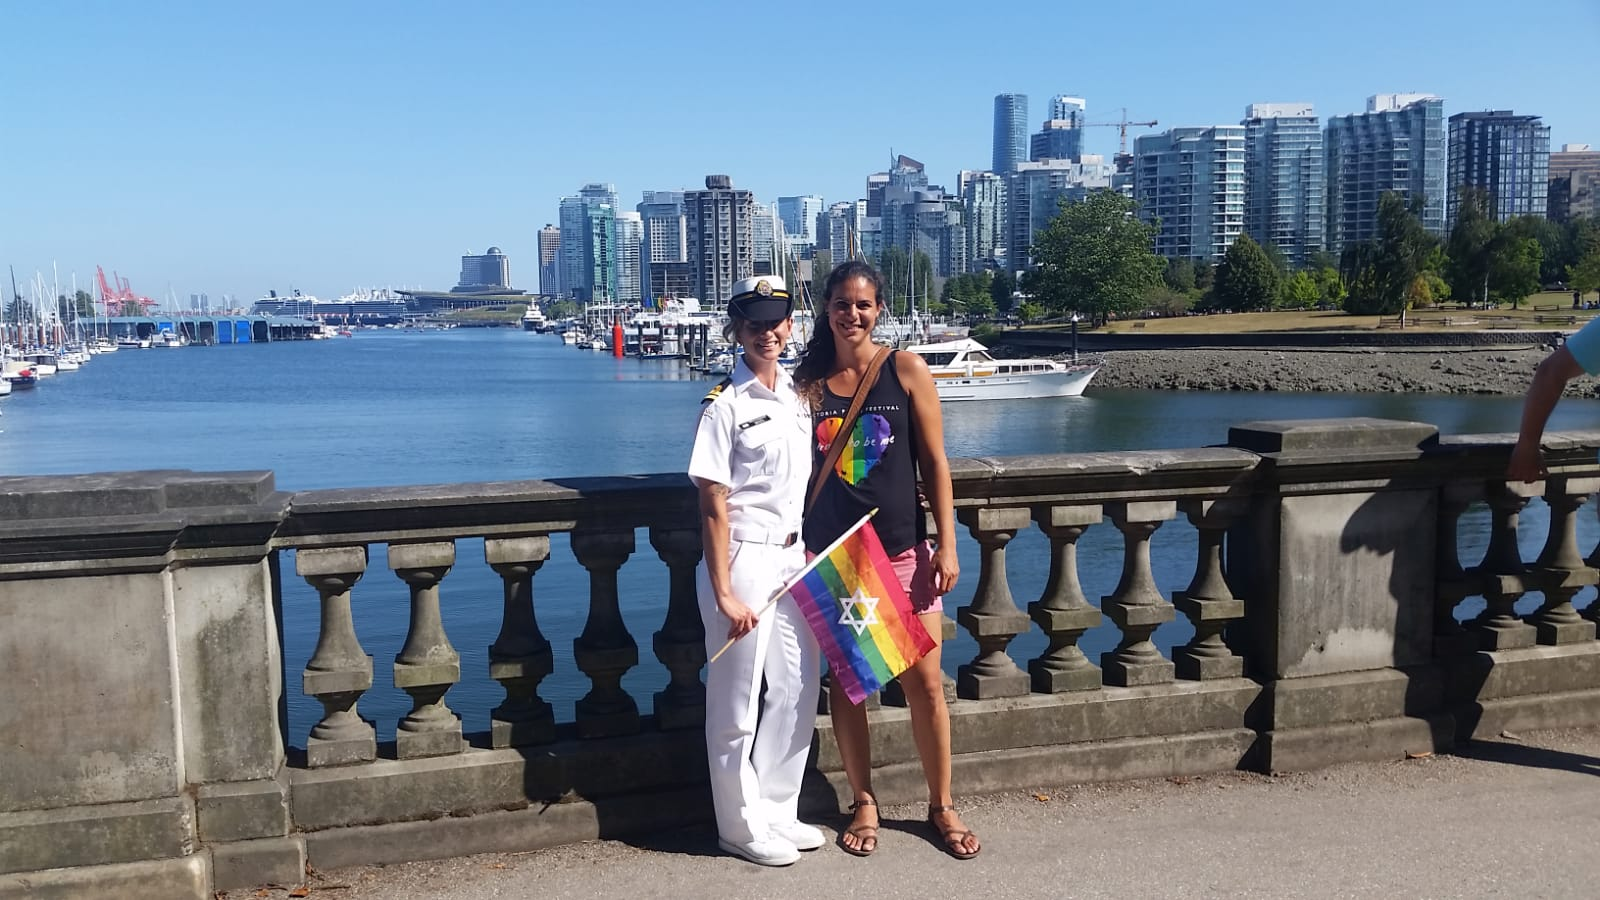

In [19]:
Image("IMG-20191201-WA0000(1).jpg")